### Rodar vídeo local

In [ ]:
# importing libraries
import cv2
import numpy as np

# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture('video.mp4')

# Check if camera opened successfully
if (cap.isOpened() == False):
    print("Error opening video  file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))

    # Display the resulting frame
    cv2.imshow('Frame', frame)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# When everything done, release
# the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()


### Rodar vídeo no youtube

In [ ]:
import webbrowser as web

url = 'https://www.youtube.com/watch?v=SfLV8hD7zX4'

web.open_new(url)


Checar links

https://docs.python.org/3/library/webbrowser.html

https://pypi.org/project/youtube-video-play-pause-bot/

https://stackoverflow.com/questions/63599903/how-can-i-play-a-youtube-video-selenium

### Audio and Video

In [ ]:
import cv2
import numpy as np
import os
from ffpyplayer.player import MediaPlayer
from time import sleep
video_path = "video.mp4"


def PlayVideo(video_path):
    video = cv2.VideoCapture(video_path)
    player = MediaPlayer(video_path)

    if (video.isOpened() == False):
        print("Error opening video  file")
        return

    # Read until video is completed
    while(video.isOpened()):
        hasContent, frame = video.read()
        audio_frame, val = player.get_frame()

        if not hasContent:
            print("End of video")
            break

        # Pause video
        if cv2.waitKey(28) & 0xFF == 32:
            while(cv2.waitKey(28) & 0xFF != 32):
                if cv2.waitKey(28) & 0xFF == ord("q"):
                    return
                sleep(0.001)

        # Quit video
        if cv2.waitKey(28) & 0xFF == ord("q"):
            break

        # Display the video image
        frame = cv2.resize(frame, (1280, 720))
        cv2.imshow("Video", frame)

        # Play the video audio
        if val != 'eof' and audio_frame is not None:
            img, t = audio_frame
    video.release()
    cv2.destroyAllWindows()


PlayVideo(video_path)


### Criar lista de reações por intervalo de segundo

In [6]:
reactions = [
    ('neutral', 0),
    ('happy', 3.667533200001344),
    ('neutral', 5.9574342999840155),
    ('sad', 10.518743799999356),
    ('neutral', 11.684130500012543),
    ('surprise', 12.83386780001456),
    ('fear', 15.099824299977627),
    ('sad', 16.253530799993314),
    ('happy', 18.42876579996664)]

reactions_step = []
current_reaction = 'neutral'
step = 0

for reaction in reactions:
    while step < reaction[1]:
        reactions_step.append((current_reaction, step))
        step += 1
    current_reaction = reaction[0]

reactions_step.append((reaction[0], step))

print(reactions_step)

[('neutral', 0), ('neutral', 1), ('neutral', 2), ('neutral', 3), ('happy', 4), ('happy', 5), ('neutral', 6), ('neutral', 7), ('neutral', 8), ('neutral', 9), ('neutral', 10), ('sad', 11), ('neutral', 12), ('surprise', 13), ('surprise', 14), ('surprise', 15), ('fear', 16), ('sad', 17), ('sad', 18), ('happy', 19)]


### Criar lista de frequência de reações

In [28]:
import collections

reactions = [
    ('neutral', 0),
    ('neutral', 1),
    ('sad', 2),
    ('neutral', 3),
    ('neutral', 4),
    ('neutral', 5),
    ('happy', 6),
    ('happy', 7),
    ('surprise', 8),
    ('surprise', 9),
    ('neutral', 10),
    ('neutral', 11),
    ('neutral', 12),
    ('neutral', 13),
    ('neutral', 14),
    ('neutral', 15),
    ('angry', 16),
    ('angry', 17),
    ('neutral', 18),
    ('neutral', 19),
    ('neutral', 20),
    ('neutral', 21),
    ('neutral', 22),
    ('sad', 23),
    ('sad', 24),
    ('happy', 25),
    ('happy', 26),
    ('happy', 27),
    ('happy', 28),
    ('happy', 29),
    ('happy', 30),
    ('happy', 31),
    ('happy', 32)]

reactions_list = [reaction[0] for reaction in reactions]
frequency_list = list(collections.Counter(reactions_list).items())
sorted_frequency_list = sorted(frequency_list, key=lambda x: (-x[1], x[0]))

print(sorted_frequency_list)


[('neutral', 16), ('happy', 10), ('sad', 3), ('angry', 2), ('surprise', 2)]


### Cria gráfico com emoções por segundo

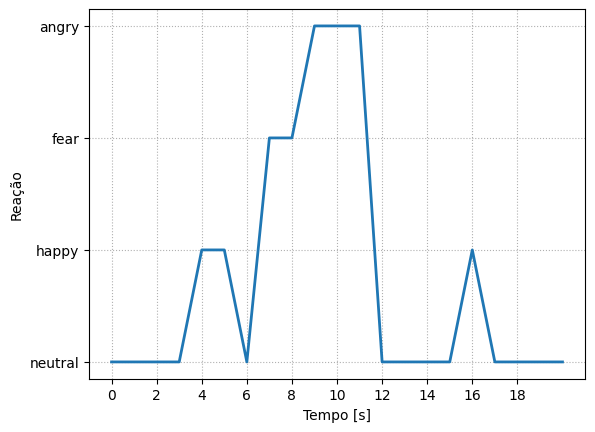

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltline
from openpyxl import load_workbook
import openpyxl
import os
import numpy

path = 'C:/Users/natha/OneDrive - Associacao Antonio Vieira/# UNISINOS/TCC2/Code/src/Results'

reactions_step = [
    ('neutral', 0),
    ('neutral', 1),
    ('neutral', 2),
    ('neutral', 3),
    ('happy', 4),
    ('happy', 5),
    ('neutral', 6),
    ('fear', 7),
    ('fear', 8),
    ('angry', 9),
    ('angry', 10),
    ('angry', 11),
    ('neutral', 12),
    ('neutral', 13),
    ('neutral', 14),
    ('neutral', 15),
    ('happy', 16),
    ('neutral', 17),
    ('neutral', 18),
    ('neutral', 19),
    ('neutral', 20)]


df1 = pd.DataFrame(reactions_step)

x1 = df1[1]
y1 = df1[0]

fig1 = pltline.figure()
ax = fig1.gca()
pltline.plot(x1, y1, linewidth=2, markersize=1)
pltline.title(label = "", fontsize=25, fontweight='bold')
pltline.ylabel('Reação')
pltline.xlabel('Tempo [s]')
ax.set_xticks(numpy.arange(0, reactions_step[-1][1], 2))
pltline.grid(linestyle=':')
pltline.savefig("GraficoLinha.png")
pltline.show()

### Cria gráfico com ranking de emoções

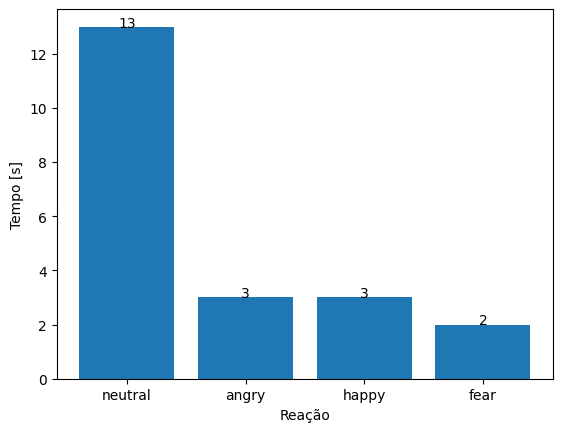

<bound method Workbook.close of <openpyxl.workbook.workbook.Workbook object at 0x000001CEA8A5D120>>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import openpyxl
import os
import numpy

path = 'C:/Users/natha/OneDrive - Associacao Antonio Vieira/# UNISINOS/TCC2/Code/src/Results'

sorted_frequency_list = [('neutral', 13), ('angry', 3), ('happy', 3), ('fear', 2)]
df2 = pd.DataFrame(sorted_frequency_list)

x2 = df2[0]
y2 = df2[1]

plt.bar(x2, y2)
plt.title(label="", fontsize=25, fontweight='bold')
plt.xlabel('Reação')
plt.ylabel('Tempo [s]')
for i in range(len(x2)):
    plt.text(i, y2[i], y2[i], ha='center')
plt.savefig("GraficoBarras.png")
plt.show()

wb = openpyxl.Workbook()
sheet = wb.active
sheet.title = 'Ranking de reações'
img = openpyxl.drawing.image.Image("GraficoBarras.png")
img.anchor = 'A1'
sheet.add_image(img)
wb.save("Teste.xlsx")
wb.close

### Salva dados em uma planilha em branco

In [41]:
import openpyxl
from openpyxl.chart import BarChart, LineChart, Reference
import pandas as pd

################################ LISTAS #################################
sorted_frequency_list = [('neutral', 13), ('angry', 3), ('happy', 3), ('fear', 2)]
reactions_step = [
    ('neutral', 0),
    ('neutral', 1),
    ('neutral', 2),
    ('neutral', 3),
    ('happy', 4),
    ('happy', 5),
    ('neutral', 6),
    ('fear', 7),
    ('fear', 8),
    ('angry', 9),
    ('angry', 10),
    ('angry', 11),
    ('neutral', 12),
    ('neutral', 13),
    ('neutral', 14),
    ('neutral', 15),
    ('happy', 16),
    ('neutral', 17),
    ('neutral', 18),
    ('neutral', 19),
    ('neutral', 20)]

# reactions_step = [(0, 'neutral'), (1, 'happy'), (2, 'fear'), (3, 'neutral')]

################################ EXCEL #################################
wb = openpyxl.Workbook()

################################ GRAPH1 #################################
sheet = wb.active
sheet.title = 'Ranking de reações'
sheet.cell(1, 1).value = "REAÇÃO"
sheet.cell(1, 2).value = "TEMPO [s]"

for item in sorted_frequency_list:
    sheet.append(item)

items = Reference(sheet, min_col=1, min_row=2,
                   max_col=1, max_row=len(sorted_frequency_list) + 1)
values = Reference(sheet, min_col=2, min_row=2,
                   max_col=2, max_row=len(sorted_frequency_list) + 1)

chart = BarChart()
chart.x_axis.title = "Reações"
chart.y_axis.title = "Tempo [s]"
chart.add_data(values)
chart.set_categories(items)
chart.legend = None

sheet.add_chart(chart, "D1")

################################ GRAPH2 #################################

sheet = wb.create_sheet()
sheet.title = "Emoções por segundo"
sheet.cell(1, 1).value = "REAÇÃO"
sheet.cell(1, 2).value = "TEMPO [s]"

for item in reactions_step:
    sheet.append(item)

items = Reference(sheet, min_col=1, min_row=2,
                  max_col=1, max_row=len(reactions_step) + 1)
values = Reference(sheet, min_col=2, min_row=2,
                   max_col=2, max_row=len(reactions_step) + 1)

chart = LineChart()
chart.x_axis.title = "Tempo [s]"
chart.y_axis.title = "Reações"
chart.add_data(values)
chart.set_categories(items)
chart.legend = None

sheet.add_chart(chart, "D1")

wb.save("Teste.xlsx")

### Gera excel com gráficos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import openpyxl
import os
import numpy

path = 'C:/Users/natha/OneDrive - Associacao Antonio Vieira/# UNISINOS/TCC2/Code/src/Results'

################################ LISTA1 #################################
reactions_step = [("neutro",0),("feliz",1),("feliz",2),("feliz",3),("feliz",4),("feliz",5),("feliz",6),("feliz",7),("feliz",8),("feliz",9),("feliz",10),("feliz",11),("feliz",12),("feliz",13),("feliz",14),("feliz",15),("feliz",16),("feliz",17),("feliz",18),("feliz",19),("feliz",20),("feliz",21),("feliz",22),("feliz",23),("feliz",24),("feliz",25),("feliz",26),("feliz",27),("feliz",28),("feliz",29),("feliz",30),("feliz",31),("feliz",32),("feliz",33),("feliz",34),("feliz",35),("feliz",36),("feliz",37),("feliz",38),("neutro",39),("neutro",40),("neutro",41),("neutro",42),("neutro",43),("neutro",44),("neutro",45),("neutro",46),("neutro",47),("neutro",48),("neutro",49),("neutro",50),("neutro",51),("neutro",52),("neutro",53),("neutro",54),("neutro",55),("neutro",56),("neutro",57),("neutro",58),("neutro",59),("neutro",60),("neutro",61),("neutro",62),("neutro",63),("neutro",64),("neutro",65),("neutro",66),("feliz",67),("neutro",68),("neutro",69),("neutro",70),("neutro",71),("neutro",72),("neutro",73),("neutro",74),("neutro",75),("feliz",76),("feliz",77),("feliz",78),("feliz",79),("feliz",80),("feliz",81),("feliz",82),("feliz",83),("feliz",84),("feliz",85),("feliz",86),("feliz",87),("feliz",88),("feliz",89),("feliz",90),("feliz",91),("feliz",92),("feliz",93),("neutro",94),("neutro",95),("feliz",96),("feliz",97),("feliz",98),("neutro",99),("neutro",100),("feliz",101),("feliz",102),("neutro",103),("neutro",104),("neutro",105),("feliz",106),("feliz",107),("feliz",108),("feliz",109),("feliz",110),("feliz",111),("feliz",112),("feliz",113),("neutro",114),("feliz",115),("neutro",116),("neutro",117),("neutro",118),("neutro",119),("feliz",120)]

df1 = pd.DataFrame(reactions_step)
x1 = df1[1]
y1 = df1[0]

################################ LISTA2 #################################
sorted_frequency_list_ = [('neutro', 30), ('feliz', 21), ('medo', 8), ('surpresa', 4), ('raiva', 2)]
sorted_frequency_list = [('neutro', 10), ('feliz', 3)]

df2 = pd.DataFrame(sorted_frequency_list)
x2 = df2[0]
y2 = df2[1]

################################ GRAPH1 #################################
width = 5 if len(reactions_step)/6 < 5 else len(reactions_step)/6
fig = plt.figure(figsize=(width, 5))

ax = fig.gca()
plt.plot(x1, y1, linewidth=2, marker=".", markersize=10)
plt.ylabel('Reação', fontweight='bold')
plt.xlabel('Tempo [s]', fontweight='bold')
ax.set_xticks(numpy.arange(0, reactions_step[-1][1]+2, 2))
plt.grid(linestyle=':')
plt.tight_layout()
plt.savefig("GraficoLinhas.png")
plt.clf()
# plt.show()

################################ GRAPH2 #################################
plt.figure()
plt.bar(x2, y2)
plt.xlabel('Reação', fontweight='bold')
plt.ylabel('Tempo [s]', fontweight='bold')
for i in range(len(x2)):
    plt.text(i, y2[i], y2[i], ha='center')
plt.tight_layout()
plt.savefig("GraficoBarras.png")
plt.clf()
# plt.show()

################################ EXCEL #################################
wb = openpyxl.Workbook()
sheet = wb.active
sheet.title = "Emoções por segundo"
sheet.cell(1, 1).value = "REAÇÃO"
sheet.cell(1, 2).value = "TEMPO [s]"
for item in reactions_step:
    sheet.append(item)
grafico_linhas = openpyxl.drawing.image.Image("GraficoLinhas.png")
grafico_linhas.anchor = 'D1'
sheet.add_image(grafico_linhas)

sheet = wb.create_sheet()
sheet.title = 'Ranking de reações'
sheet.cell(1, 1).value = "REAÇÃO"
sheet.cell(1, 2).value = "TEMPO [s]"
for item in sorted_frequency_list:
    sheet.append(item)
grafico_barras = openpyxl.drawing.image.Image("GraficoBarras.png")
grafico_barras.anchor = 'D1'
sheet.add_image(grafico_barras)

wb.save(f"{path}/Results.xlsx")
wb.close

os.remove("GraficoLinhas.png")
os.remove("GraficoBarras.png")


<Figure size 500x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Gera gráfico linhas

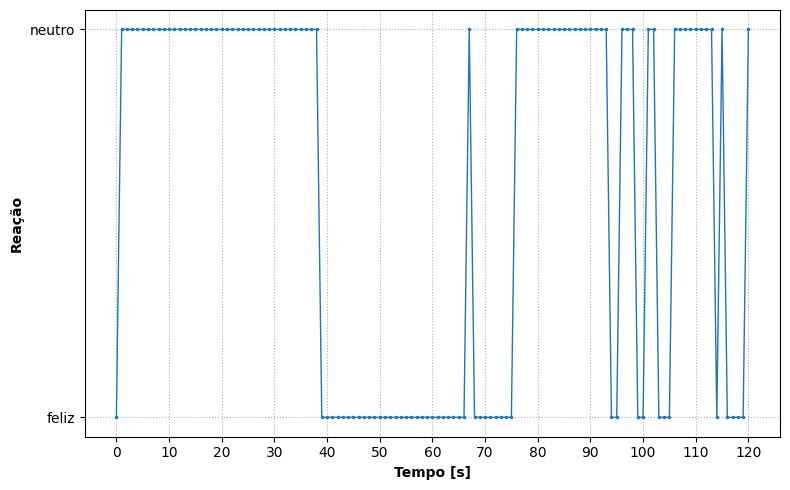

<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import openpyxl
import os
import numpy

################################ LISTA1 #################################
reactions_step = [("neutro",0),("feliz",1),("feliz",2),("feliz",3),("feliz",4),("feliz",5),("feliz",6),("feliz",7),("feliz",8),("feliz",9),("feliz",10),("feliz",11),("feliz",12),("feliz",13),("feliz",14),("feliz",15),("feliz",16),("feliz",17),("feliz",18),("feliz",19),("feliz",20),("feliz",21),("feliz",22),("feliz",23),("feliz",24),("feliz",25),("feliz",26),("feliz",27),("feliz",28),("feliz",29),("feliz",30),("feliz",31),("feliz",32),("feliz",33),("feliz",34),("feliz",35),("feliz",36),("feliz",37),("feliz",38),("neutro",39),("neutro",40),("neutro",41),("neutro",42),("neutro",43),("neutro",44),("neutro",45),("neutro",46),("neutro",47),("neutro",48),("neutro",49),("neutro",50),("neutro",51),("neutro",52),("neutro",53),("neutro",54),("neutro",55),("neutro",56),("neutro",57),("neutro",58),("neutro",59),("neutro",60),("neutro",61),("neutro",62),("neutro",63),("neutro",64),("neutro",65),("neutro",66),("feliz",67),("neutro",68),("neutro",69),("neutro",70),("neutro",71),("neutro",72),("neutro",73),("neutro",74),("neutro",75),("feliz",76),("feliz",77),("feliz",78),("feliz",79),("feliz",80),("feliz",81),("feliz",82),("feliz",83),("feliz",84),("feliz",85),("feliz",86),("feliz",87),("feliz",88),("feliz",89),("feliz",90),("feliz",91),("feliz",92),("feliz",93),("neutro",94),("neutro",95),("feliz",96),("feliz",97),("feliz",98),("neutro",99),("neutro",100),("feliz",101),("feliz",102),("neutro",103),("neutro",104),("neutro",105),("feliz",106),("feliz",107),("feliz",108),("feliz",109),("feliz",110),("feliz",111),("feliz",112),("feliz",113),("neutro",114),("feliz",115),("neutro",116),("neutro",117),("neutro",118),("neutro",119),("feliz",120)]

df1 = pd.DataFrame(reactions_step)
x1 = df1[1]
y1 = df1[0]

################################ GRAPH1 #################################
# width = 5 if len(reactions_step)/6 < 5 else len(reactions_step)/6
fig = plt.figure(figsize=(8, 5))

ax = fig.gca()

bins = ['neutro', 'feliz']
datamap = {'neutro':1, 'feliz':2}
data = list(map(lambda x: datamap[x], y1))
plt.plot(data, linewidth=1, marker=".", markersize=3)
plt.yticks([2, 1], bins)

# plt.plot(x1, y1, linewidth=1, marker=".", markersize=3)
plt.ylabel('Reação', fontweight='bold')
plt.xlabel('Tempo [s]', fontweight='bold')
ax.set_xticks(numpy.arange(0, reactions_step[-1][1]+2, 10))
plt.grid(linestyle=':')
plt.tight_layout()
plt.savefig("GraficoLinhas.png")
plt.show()
plt.clf()

### Gera gráfico barras

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import openpyxl
import os
import numpy

################################ LISTA #################################
sorted_frequency_list = [("neutro", 140), ("triste", 53), ("feliz", 47), ("raiva", 31), ("surpresa", 1)]





df2 = pd.DataFrame(sorted_frequency_list)
x2 = df2[0]
y2 = df2[1]

################################ GRAPH #################################
plt.figure()
plt.bar(x2, y2)
plt.xlabel('Reação', fontweight='bold')
plt.ylabel('Tempo [s]', fontweight='bold')
for i in range(len(x2)):
    plt.text(i, y2[i], y2[i], ha='center')
plt.tight_layout()
plt.savefig("GraficoBarras.png")
plt.clf()
# plt.show()

<Figure size 640x480 with 0 Axes>

### Traduz reações

In [5]:
reactions = [
    ('neutral', 0),
    ('happy', 3.322744000000057),
    ('neutral', 5.560093500000221),
    ('fear', 6.676402500000222),
    ('angry', 8.942872200000238),
    ('neutral', 11.220656400000735),
    ('happy', 15.75596780000069),
    ('neutral', 16.86338640000031),
    ('neutral', 19.146108200000526)]

print(reactions)
for index, reaction in enumerate(reactions):
    item = list(reaction)
    match item[0]:
        case 'neutral':
            item[0] = 'neutro'
        case 'happy':
            item[0] = 'feliz'
        case 'fear':
            item[0] = 'medo'
        case 'angry':
            item[0] = 'raiva'
        case 'sad':
            item[0] = 'triste'
        case 'disgust':
            item[0] = 'desgosto'
        case 'surprise':
            item[0] = 'surpresa'
    reactions[index] = tuple(item)
print(reactions)

[('neutral', 0), ('happy', 3.322744000000057), ('neutral', 5.560093500000221), ('fear', 6.676402500000222), ('angry', 8.942872200000238), ('neutral', 11.220656400000735), ('happy', 15.75596780000069), ('neutral', 16.86338640000031), ('neutral', 19.146108200000526)]
[('neutro', 0), ('feliz', 3.322744000000057), ('neutro', 5.560093500000221), ('medo', 6.676402500000222), ('raiva', 8.942872200000238), ('neutro', 11.220656400000735), ('feliz', 15.75596780000069), ('neutro', 16.86338640000031), ('neutro', 19.146108200000526)]
